<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_python/da05_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 모듈 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# tips 데이터셋 준비

In [2]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# Box plot

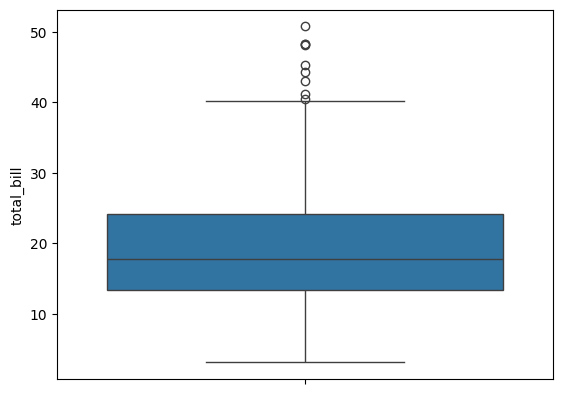

In [7]:
# total_bill의 box plot
sns.boxplot(data=tips, y='total_bill')
plt.show()

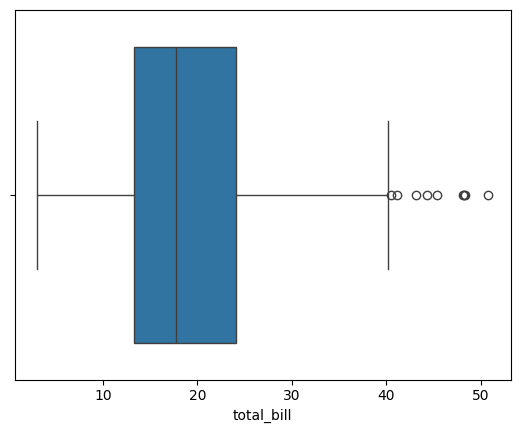

In [8]:
sns.boxplot(data=tips, x='total_bill')
plt.show()

## 성별 팁의 box plot

In [11]:
tips[tips.sex == 'Male'].tip.describe()

,tip
count,157.000000
mean,3.089618
std,1.489102
min,1.000000
25%,2.000000
50%,3.000000
75%,3.760000
max,10.000000


In [15]:
tips[tips.sex == 'Female'].tip.describe()

,tip
count,87.000000
mean,2.833448
std,1.159495
min,1.000000
25%,2.000000
50%,2.750000
75%,3.500000
max,6.500000


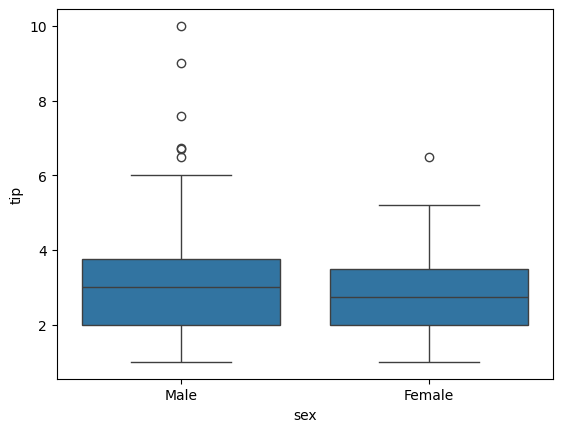

In [16]:
sns.boxplot(data=tips, x='sex', y='tip')
plt.show()

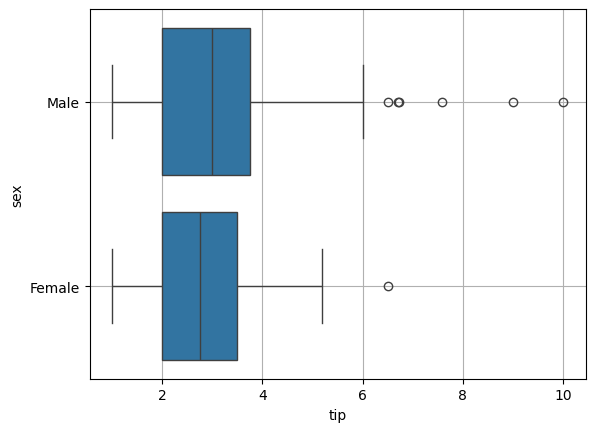

In [18]:
sns.boxplot(data=tips, x='tip', y='sex')
plt.grid()
plt.show()

## 요일별 팁의 box plot

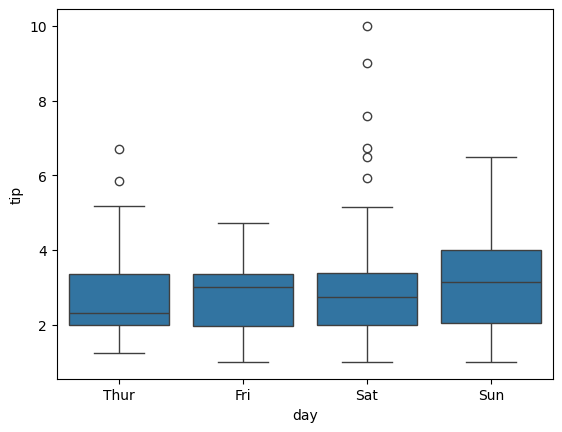

In [19]:
sns.boxplot(data=tips, x='day', y='tip')
plt.show()

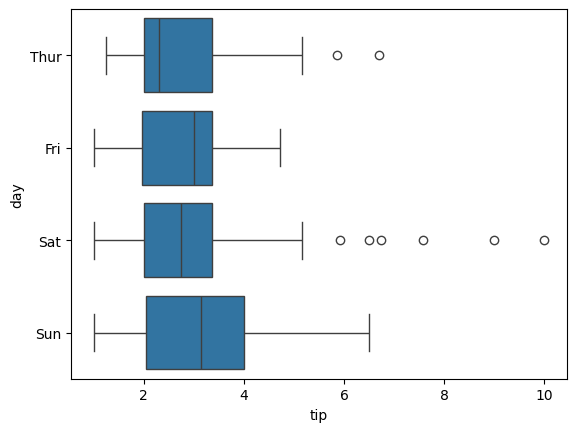

In [20]:
sns.boxplot(data=tips, x='tip', y='day')
plt.show()

## 시간별 팁의 box plot

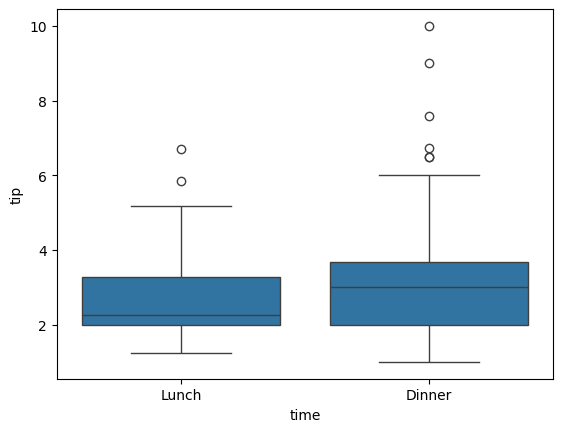

In [21]:
sns.boxplot(data=tips, x='time', y='tip')
plt.show()

## 요일별 성별 팁의 box plot

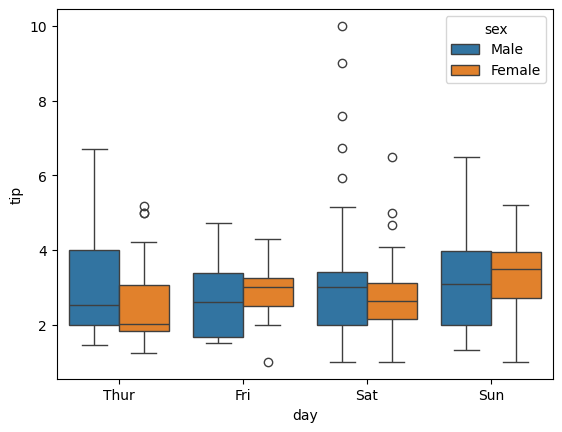

In [22]:
sns.boxplot(data=tips, x='day', y='tip', hue='sex')
plt.show()

In [25]:
# 토요일 남성 팁의 기술 통계량
tips[(tips.day == 'Sat') & (tips.sex == 'Male')].tip.describe()

,tip
count,59.000000
mean,3.083898
std,1.791360
min,1.000000
25%,2.000000
50%,3.000000
75%,3.400000
max,10.000000


In [26]:
# 토요일 여성 팁의 기술 통계량
tips[(tips.day == 'Sat') & (tips.sex == 'Female')].tip.describe()

,tip
count,28.000000
mean,2.801786
std,1.234480
min,1.000000
25%,2.150000
50%,2.625000
75%,3.102500
max,6.500000


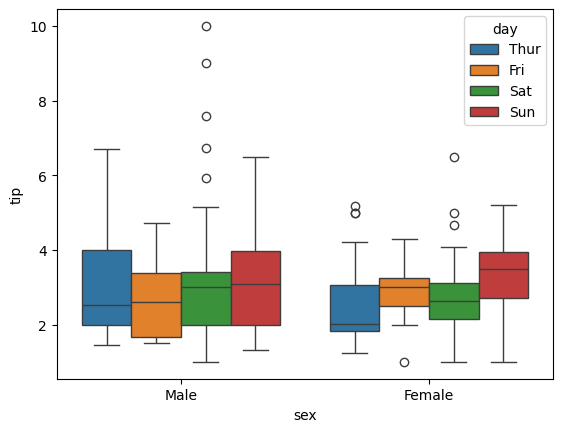

In [27]:
sns.boxplot(data=tips, x='sex', y='tip', hue='day')
plt.show()

## 요일별 흡연여부별 팁의 box plot

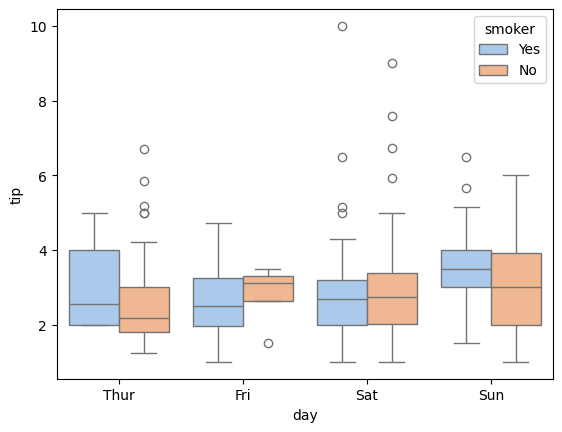

In [29]:
sns.boxplot(data=tips, x='day', y='tip', hue='smoker', palette='pastel')
plt.show()

## 2개 이상의 Axes 사용하기

Figure에 2개의 Axes를 1x2 모양(nrows=1, ncols=2)으로 생성해서, 각각의 Axes에 box plot 표시.

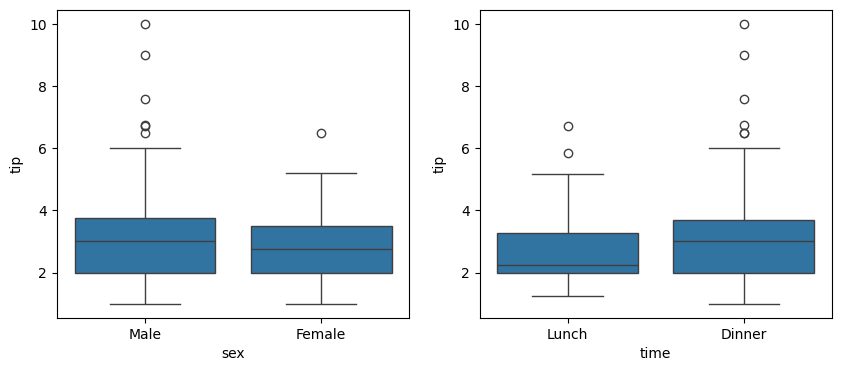

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# 성별 팁의 box plot
sns.boxplot(data=tips, x='sex', y='tip', ax=axes[0])

# 시간별 팁의 box plot
sns.boxplot(data=tips, x='time', y='tip', ax=axes[1])

plt.show()

# Histogram

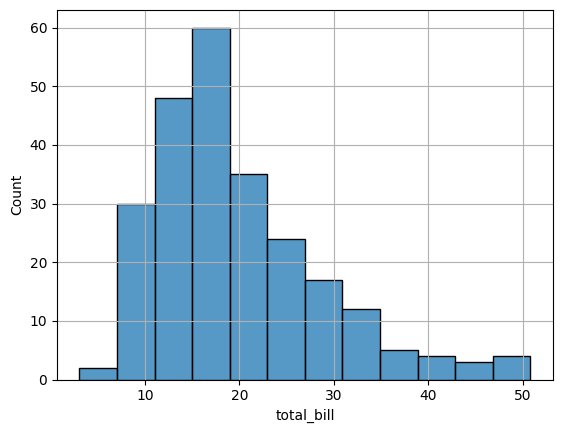

In [39]:
# 영수증 총액(total_bill) 히스토그램
sns.histplot(data=tips, x='total_bill', bins=12)
plt.grid()
plt.show()

Figure에 2x1 모양(nrows=2, ncols=1)으로 Axes 2갤를 생성하고, 위쪽에는 tip의 box plot을, 아래쪽에는 tip의 histogram을 그리세요.

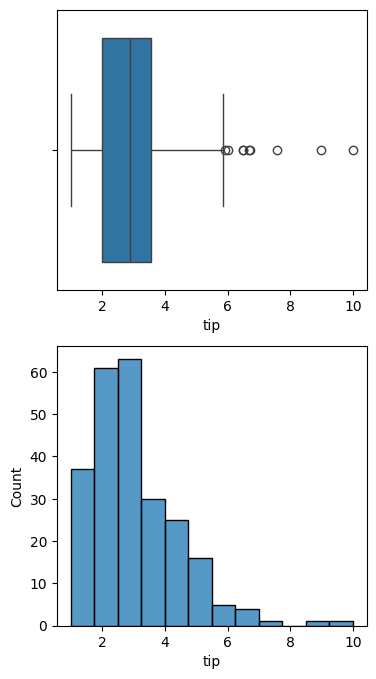

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(4, 8))

sns.boxplot(data=tips, x='tip', ax=axes[0])
sns.histplot(data=tips, x='tip', bins=12, ax=axes[1])

plt.show()

# 막대 그래프

## `countplot()`

카테고리(범주) 타입 변수의 빈도수를 막대로 시각화.

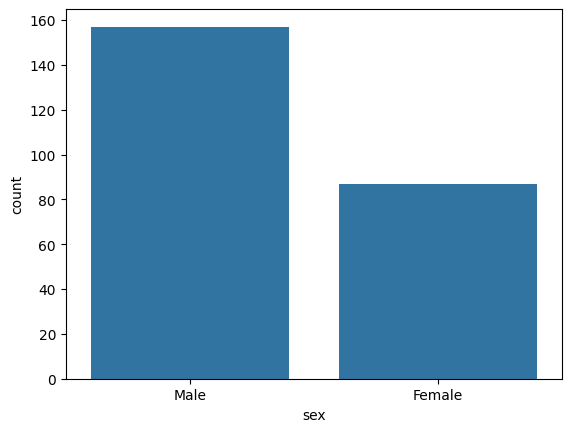

In [45]:
sns.countplot(data=tips, x='sex')
plt.show()

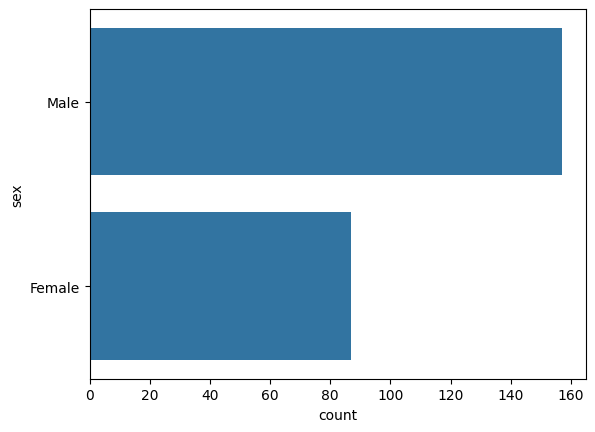

In [46]:
sns.countplot(data=tips, y='sex')
plt.show()

In [47]:
tips.sex.value_counts()

,count
sex,
Male,157
Female,87


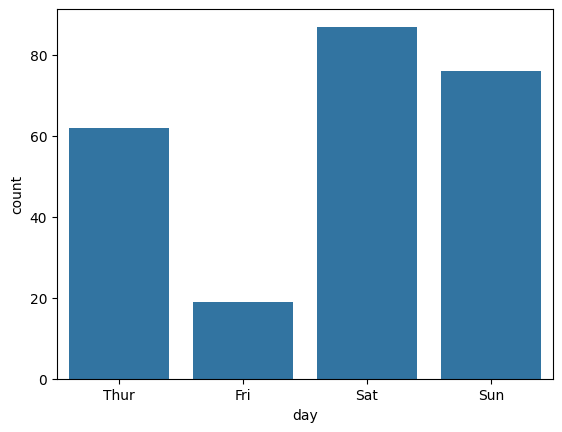

In [48]:
# 요일 빈도수 막대 그래프
sns.countplot(data=tips, x='day')
plt.show()

In [54]:
tips[tips.day == 'Thur'].day.count()

np.int64(62)

In [55]:
tips[tips.day == 'Fri'].day.count()

np.int64(19)

In [56]:
tips.day.value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


### 그룹(카테고리)별 빈도수 막대 그래프

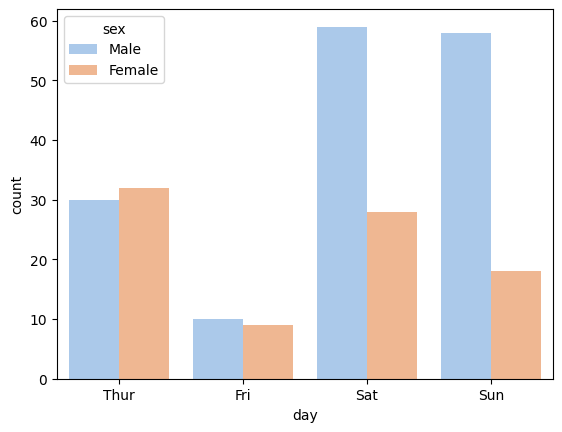

In [49]:
# 요일별 성별 빈도수 막대 그래프
sns.countplot(data=tips, x='day', hue='sex', palette='pastel')
plt.show()

In [59]:
tips[tips.day == 'Thur'].sex.value_counts()

,count
sex,
Female,32
Male,30


In [61]:
tips.groupby(by=['day', 'sex'], observed=True).sex.count()

day   sex   
Thur  Male      30
      Female    32
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Name: sex, dtype: int64

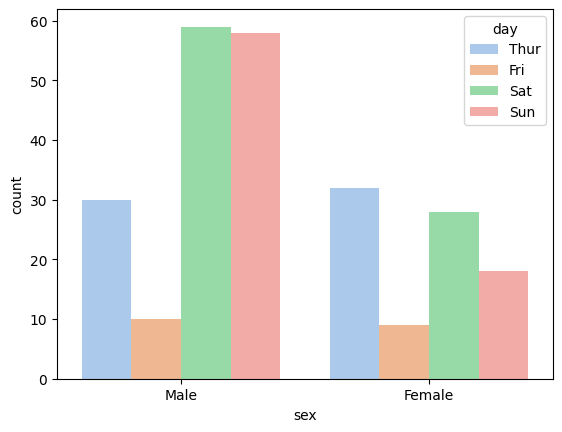

In [50]:
sns.countplot(data=tips, x='sex', hue='day', palette='pastel')
plt.show()

In [62]:
tips.groupby(by=['sex', 'day'], observed=True).day.count()

sex     day 
Male    Thur    30
        Fri     10
        Sat     59
        Sun     58
Female  Thur    32
        Fri      9
        Sat     28
        Sun     18
Name: day, dtype: int64

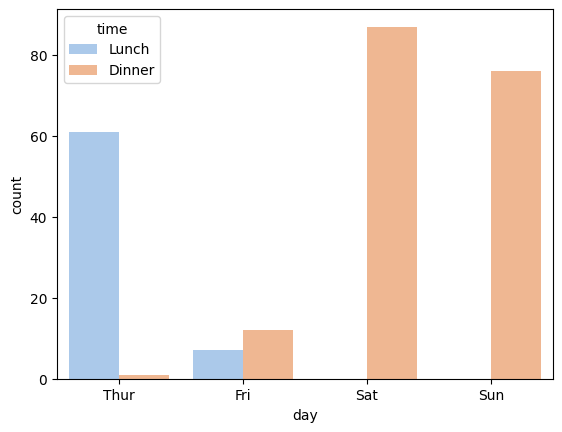

In [63]:
# 요일별 시간별 빈도수 막대 그래프
sns.countplot(data=tips, x='day', hue='time', palette='pastel')
plt.show()

In [67]:
# 요일별 시간별 빈도수
tips.groupby(by=['day', 'time'], observed=True).time.count()
#> observed 파라미터: True이면 값이 있는 자료들만 결과로 리턴,
# False이면 값이 없는 자료들도 (0으로) 리턴.

day   time  
Thur  Lunch     61
      Dinner     1
Fri   Lunch      7
      Dinner    12
Sat   Dinner    87
Sun   Dinner    76
Name: time, dtype: int64

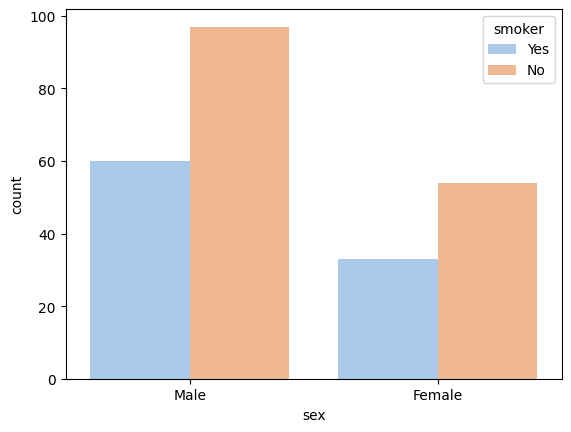

In [69]:
# 성별 흡연여부별 빈도수 막대 그래프
sns.countplot(data=tips, x='sex', hue='smoker', palette='pastel')
plt.show()

In [71]:
tips.groupby(by=['sex', 'smoker'], observed=True).smoker.count()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: smoker, dtype: int64

## `barplot()`

*   그룹별 (숫자 타입) 변수의 기술 통계량(평균, 합계, 중앙값, ...)을 막대로 시각화.
*   카테고리(범주) 타입 변수와 연속형 변수를 함께 시각화.


### 성별 팁의 평균

In [75]:
tips[tips.sex == 'Male'].tip.mean()

np.float64(3.0896178343949043)

In [76]:
tips[tips.sex == 'Female'].tip.mean()

np.float64(2.8334482758620685)

In [78]:
tips.groupby(by=['sex'], observed=True).tip.mean()

,tip
sex,
Male,3.089618
Female,2.833448


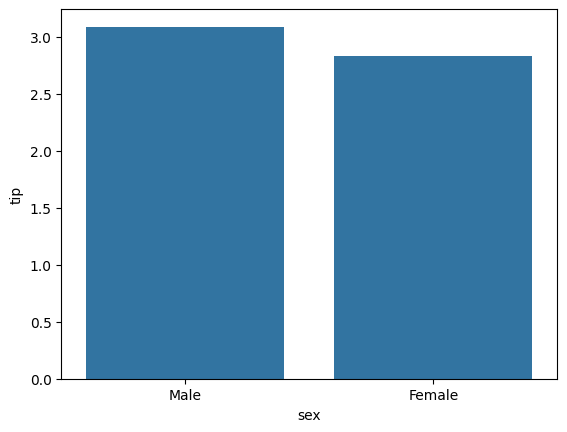

In [81]:
sns.barplot(data=tips, x='sex', y='tip', errorbar=None)
#> barplot 함수의 estimator 파라미터의 기본값이 'mean'이기 때문에 평균을 계산해줌.
plt.show()

### 성별 팁의 최댓값

In [84]:
tips.groupby(by=['sex'], observed=True).tip.max()

,tip
sex,
Male,10.0
Female,6.5


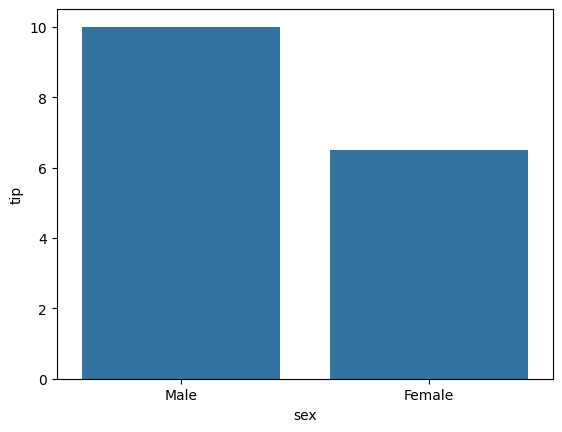

In [86]:
sns.barplot(data=tips, x='sex', y='tip', estimator='max', errorbar=None)
plt.show()

### 요일별 팁의 평균 가로 막대 그래프

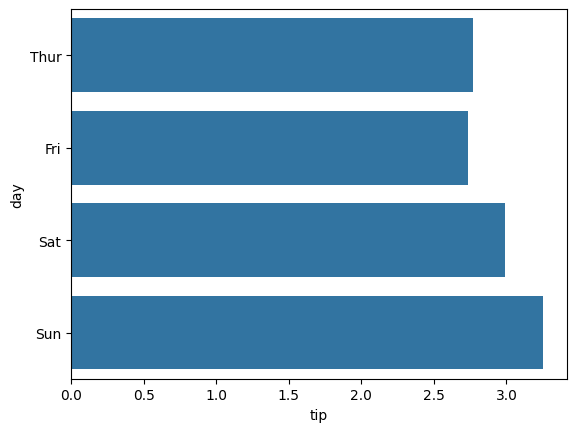

In [87]:
sns.barplot(data=tips, x='tip', y='day', errorbar=None)
plt.show()

In [88]:
tips.groupby(by=['day'], observed=True).tip.mean()

,tip
day,
Thur,2.771452
Fri,2.734737
Sat,2.993103
Sun,3.255132


### 요일별 흡연여부별 팁의 평균 막대 그래프

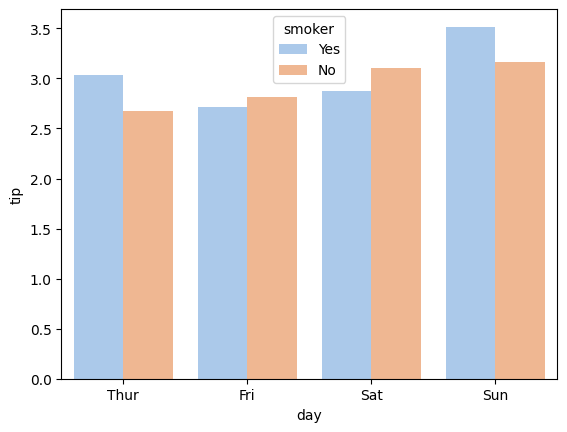

In [94]:
sns.barplot(data=tips, x='day', y='tip', hue='smoker', errorbar=None, palette='pastel')
plt.show()

In [92]:
tips.groupby(by=['day', 'smoker'], observed=True).tip.mean()

day   smoker
Thur  Yes       3.030000
      No        2.673778
Fri   Yes       2.714000
      No        2.812500
Sat   Yes       2.875476
      No        3.102889
Sun   Yes       3.516842
      No        3.167895
Name: tip, dtype: float64

# Scatter plot(산점도)

두 변수 간의 상관관계를 시각화.

## `scatterplot()`

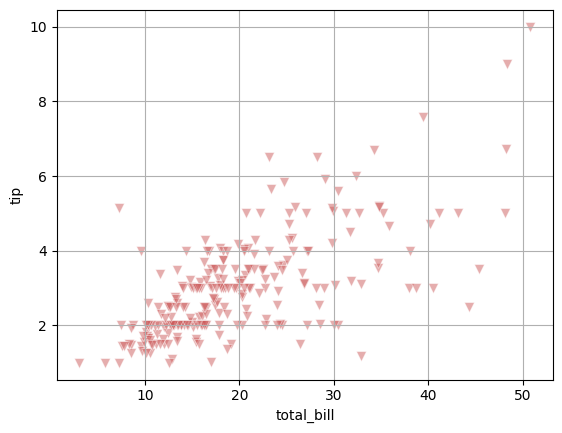

In [105]:
# tip ~ total_bill 산점도
sns.scatterplot(data=tips, x='total_bill', y='tip',
                s=50, c='IndianRed', marker='v', alpha=0.5)
#> plt.scatter() 함수의 파라미터들을 그대로 사용할 수 있음.
#> s=마커 크기. c=마커 색깔. marker=마커 종류. alpha=불투명도.
plt.grid()
plt.show()

## `regplot()`

regression plot: 산점도 + 선형 회귀(linear regression) 직선.

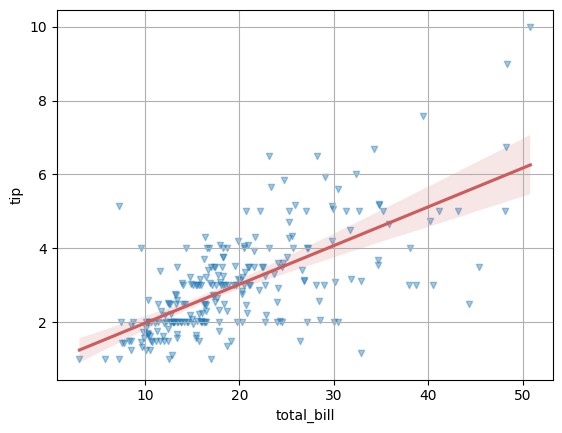

In [121]:
sns.regplot(data=tips, x='total_bill', y='tip', marker='v',
            scatter_kws={'alpha': 0.4, 's': 20},
            line_kws={'color': 'IndianRed'})
#> scatter_kws: 산점도의 설정을 변경하기 위한 dictionary.
#> line_kws: 선형 회귀 직선의 설정을 변경하기 위한 dictionary.
plt.grid()
plt.show()

## `jointplot()`

산점도 + 히스토그램

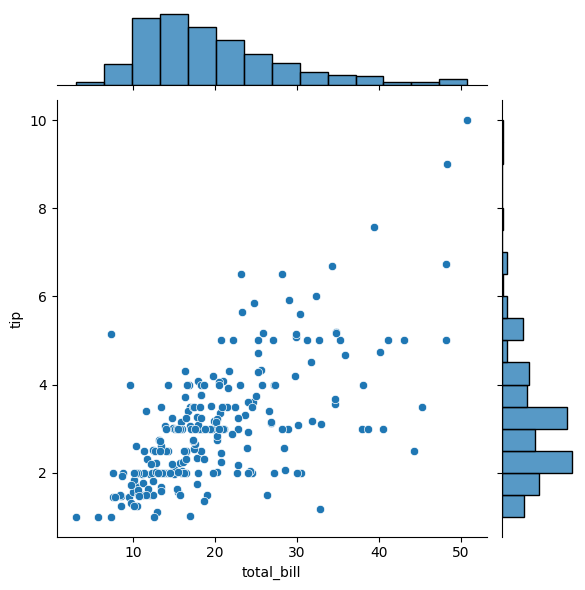

In [122]:
sns.jointplot(data=tips, x='total_bill', y='tip')
plt.show()

## Ex. 1

tip ~ total_bill 산점도. 마커의 색깔을 성별에 따라서 다르게 시각화.

## Ex. 2

tip ~ total_bill 산점도. 마커 색깔은 성별 따라서 다르게, 마커의 크기를 size(인원수)에 따라서 다르게 시각화.

## Ex. 3

tip ~ total_bill 산점도. 마커 색깔은 성별에 따라서 다르게, 마커 모양은 흡연여부에 따라서 다르게 시각화.